In [ ]:
! pip install fastbook

In [48]:
from fastbook import *
from fastai.vision.all import *
import os
from pathlib import Path

# !pip install fastbook
# from fastbook import *
# from fastai.vision.all import *


In [49]:


def search_images(term, max_images=200):
    print(f"Searching for '{term}'")
    return search_images_ddg(term, max_images=max_images)
def download_and_save_images(search_term, path, max_images=200):
    path.mkdir(parents=True, exist_ok=True)
    urls = search_images(search_term, max_images=max_images)
    download_images(path, urls=urls)

#paths
path = Path('gender_classification')
path_male = path / 'male'
path_female = path / 'female'
download_and_save_images('male face', path_male, max_images=200)
download_and_save_images('female face', path_female, max_images=200)

#remove the failed img
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

print(f"Downloaded images have been saved to: {path}")


Searching for 'male face'
Searching for 'female face'
Downloaded images have been saved to: gender_classification


### **DataBlock**

In [50]:
gender_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
)
dls = gender_data.dataloaders(path, bs=32)

### **Resize Image by Adding Padding**

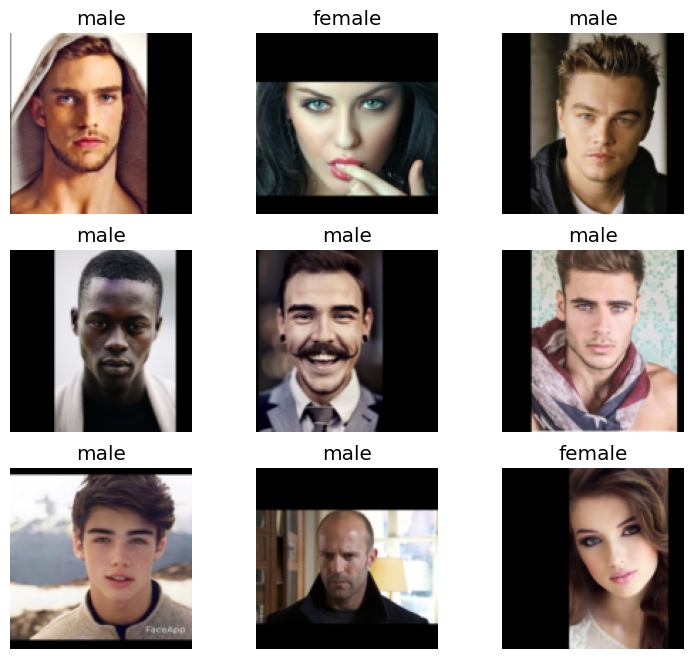

In [52]:
gender_data = gender_data.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = gender_data.dataloaders(path)
dls.show_batch(max_n=9, figsize=(9, 8))

### **Data Augmentation**

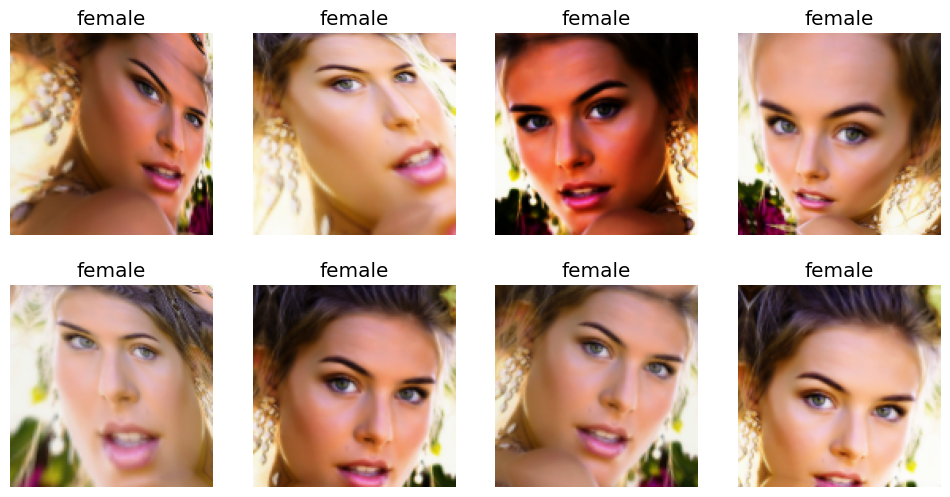

In [53]:
gender_data = gender_data.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = gender_data.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [54]:
gender_data = gender_data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = gender_data.dataloaders(path)

### **Train Model resnet 18**

In [55]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.665349,0.092050,0.035971,00:32


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.185518,0.063231,0.028777,00:32
1,0.125301,0.035963,0.014388,00:33
2,0.101122,0.015599,0.007194,00:32
3,0.080074,0.015217,0.007194,00:31


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


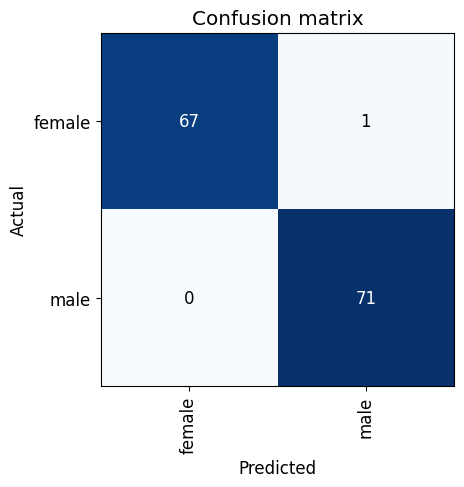

In [56]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

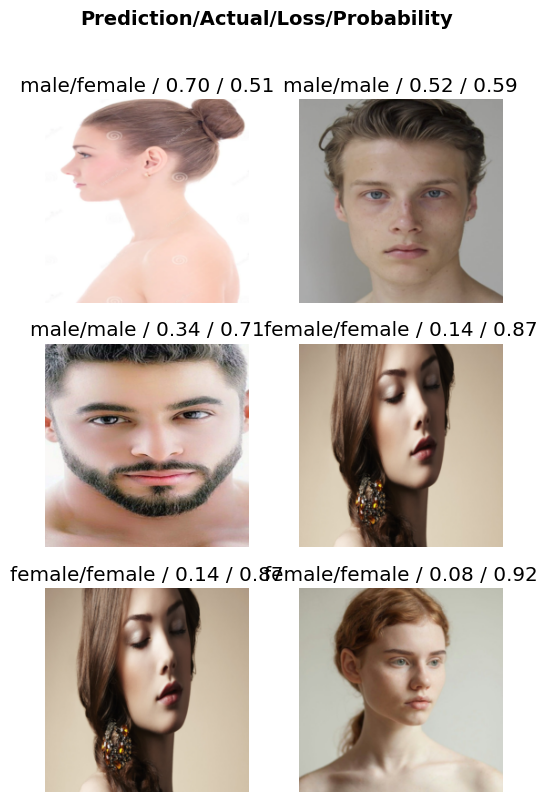

In [57]:

interp.plot_top_losses(6, nrows=3)

In [58]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [45]:
uploader = SimpleNamespace(data = ['/content/gender_classification/male/0c635416-e510-48f7-96da-532ab5dd4369.png'])

In [59]:
learn.predict('/content/gender_classification/male/0c635416-e510-48f7-96da-532ab5dd4369.png')

('male', tensor(1), tensor([3.1797e-07, 1.0000e+00]))

In [46]:
img = PILImage.create(uploader.data[0])
is_male,_,probs = learn.predict(img)
print(f"Is this a male?: {is_male}.")
print(f"Probability it's a male: {probs[1].item():.6f}")

Is this a male?: male.
Probability it's a male: 0.999998


In [60]:
learn.export()


In [61]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]